In [38]:
%matplotlib inline
import sys
sys.path.append("simple_pe")
from contour_values_from_2Dpdf import contour_value_from_posterior
import fstat
import likelihood
import numpy
from matplotlib import pyplot as plt
from numpy import *
from matplotlib import axes
%config InlineBackend.figure_format = 'retina' 

In [30]:
plt.rcParams.update({
    "lines.markersize": 6,
    "lines.markeredgewidth": 1.5,
    "lines.linewidth": 3.0,
    "font.size": 20,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 20,
})

In [54]:
alphas = [0.09, 0.15]
true_cosinclination = [-0.70710360613]
psi = 0
true_distance = 410
inclow, inchigh = -1.,0.+0.001
estimated_cosinclination = numpy.arange(inclow, inchigh,.01)
dlow, dhigh = .25*true_distance, 1.5*true_distance
distance = numpy.arange(dlow, dhigh,.005*true_distance)
lost_snrsq = numpy.zeros((len(alphas), len(true_cosinclination), len(estimated_cosinclination), len(distance), 3))
like_marg = numpy.zeros((len(alphas), len(true_cosinclination), len(estimated_cosinclination), len(distance), 3))
like_dist = numpy.zeros((len(alphas), len(true_cosinclination), len(estimated_cosinclination), len(distance), 3))
expected_snr = numpy.zeros((len(alphas),len(true_cosinclination)))
estimated_snr = numpy.zeros((len(alphas),len(true_cosinclination)))
reset_dist = numpy.zeros(2)

In [55]:
f_plus = 1
sigma = 13700
f_plus *= sigma

for m,alpha in enumerate(alphas):
    f_cross = f_plus * alpha
    for i,iota in enumerate(true_cosinclination):
        a_hat = fstat.params_to_a(true_distance,iota,psi)
        snr_reset = fstat.set_snr(a_hat, f_plus, f_cross, 25.1)
        a_hat_reset = snr_reset[0]
        dist_reset = snr_reset[1]
        print "Distance has been reset to %d Mpc" %dist_reset
        reset_dist[i] = dist_reset
        for j,off_inclination in enumerate(estimated_cosinclination):
            print "Inclination #%d of %d." %(j, len(estimated_cosinclination)),
            for k,dist in enumerate(distance):
                a = fstat.params_to_a(dist,off_inclination,psi)
                like_dist[m][i][j][k][0] = off_inclination
                like_dist[m][i][j][k][1] = dist
                like_dist[m][i][j][k][2] = likelihood.like_d_cosi(a_hat_reset,f_plus,f_cross,dist,off_inclination) * dist ** 2

Distance has been reset to 410 Mpc
Inclination #0 of 101. Inclination #1 of 101. Inclination #2 of 101. Inclination #3 of 101. Inclination #4 of 101. Inclination #5 of 101. Inclination #6 of 101. Inclination #7 of 101. Inclination #8 of 101. Inclination #9 of 101. Inclination #10 of 101. Inclination #11 of 101. Inclination #12 of 101. Inclination #13 of 101. Inclination #14 of 101. Inclination #15 of 101. Inclination #16 of 101. Inclination #17 of 101. Inclination #18 of 101. Inclination #19 of 101. Inclination #20 of 101. Inclination #21 of 101. Inclination #22 of 101. Inclination #23 of 101. Inclination #24 of 101. Inclination #25 of 101. Inclination #26 of 101. Inclination #27 of 101. Inclination #28 of 101. Inclination #29 of 101. Inclination #30 of 101. Inclination #31 of 101. Inclination #32 of 101. Inclination #33 of 101. Inclination #34 of 101. Inclination #35 of 101. Inclination #36 of 101. Inclination #37 of 101. Inclination #38 of 101. Inclination #39 of 101. Inclination #40

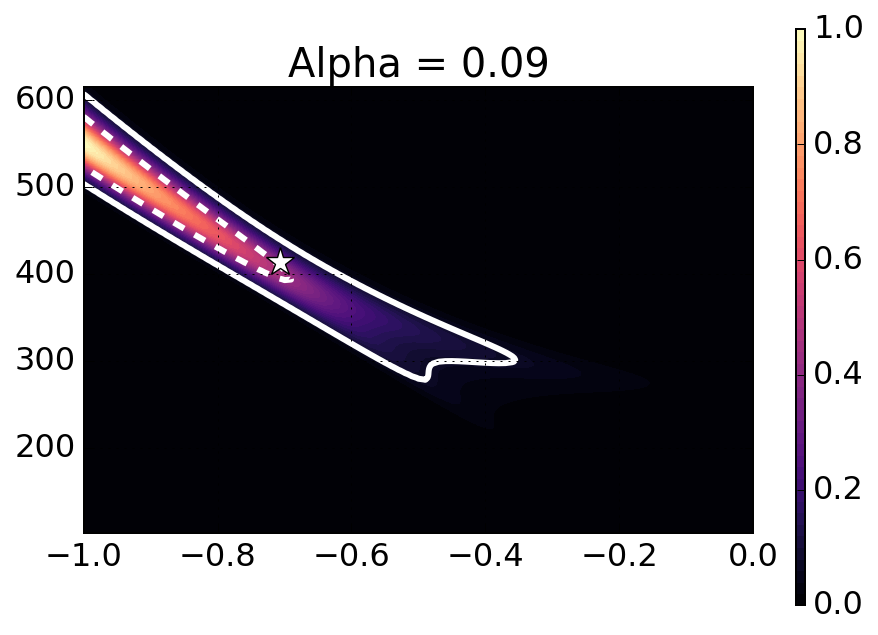

In [68]:
ax = plt.figure()

plt.plot([true_cosinclination], [reset_dist[0]], marker='*', markersize=15, color="white", markeredgewidth=0.7, markeredgecolor="black")
mappable = plt.contourf(like_dist[0,0,:,:,0], like_dist[0,0,:,:,1], numpy.abs(like_dist[0,0,:,:,2])/numpy.amax(like_dist[0,0,:,:,2]), 50, cmap="magma")
contour_vals = [contour_value_from_posterior(like_dist[0,0,:,:,2], 90), contour_value_from_posterior(like_dist[0,0,:,:,2], 50)]
plt.contour(like_dist[0,0,:,:,0], like_dist[0,0,:,:,1], numpy.abs(like_dist[0,0,:,:,2]), contour_vals, colors = 'w', linestyles = ['-','--'])

plt.grid()
plt.margins(x=0,y=0)

# add iota ticks at the top of the plot:
#axTop = ax.twiny()
#iotas = linspace(180, 0, 7)
#iotas = numpy.delete(iotas, 1) #delete label at 170 as this looks messy
#axTop.set_xlim(inclow,inchigh)
#axTop.set_xticks(cos(iotas*pi/180))
#axTop.set_xticklabels(['{:.0f}'.format(i) for i in iotas])
#axTop.set_xlabel(r'$\iota$ ($\mathrm{deg}$)')
#plt.setp(ax.get_xticklabels(), visible=False)
#plt.set_xlabel("$\cos \iota$")
#plt.set_ylabel("$d_L$ ($\mathrm{Mpc}$)")
#plt.setp(ax.get_yticklabels(), visible=False)
plt.title("Alpha = %.2f" %alphas[0])

cbar_ax = ax.add_axes([0.95, 0.0, 0.01, 1.0])
cb = plt.colorbar(mappable, cax = cbar_ax,ticks=linspace(0,1,6))

plt.savefig("probs_plots/GW150914_alpha09.png", bbox_inches = "tight")


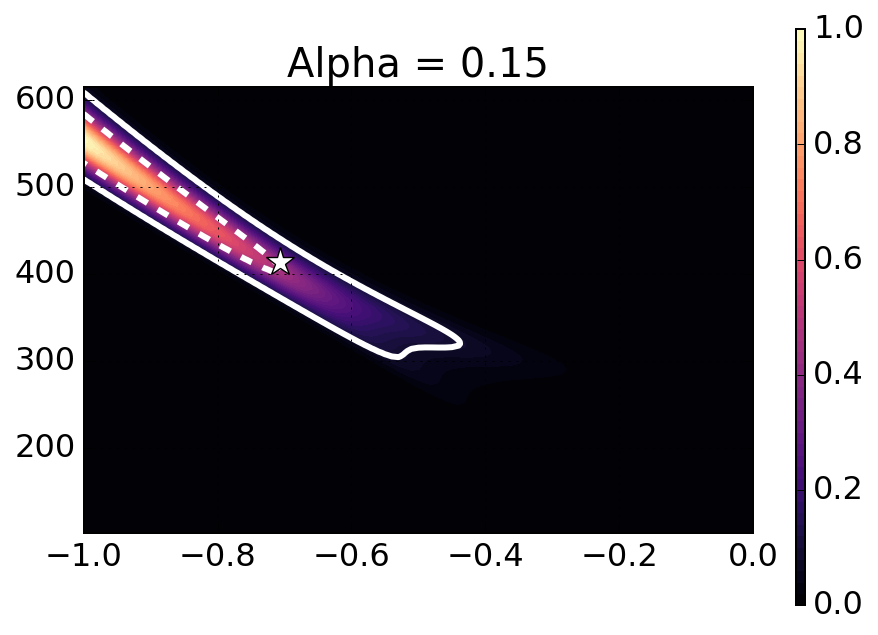

In [70]:
ax = plt.figure()

plt.plot([true_cosinclination], [reset_dist[0]], marker='*', markersize=15, color="white", markeredgewidth=0.7, markeredgecolor="black")
mappable = plt.contourf(like_dist[1,0,:,:,0], like_dist[1,0,:,:,1], numpy.abs(like_dist[1,0,:,:,2])/numpy.amax(like_dist[1,0,:,:,2]), 50, cmap="magma")
contour_vals = [contour_value_from_posterior(like_dist[1,0,:,:,2], 90), contour_value_from_posterior(like_dist[1,0,:,:,2], 50)]
plt.contour(like_dist[1,0,:,:,0], like_dist[1,0,:,:,1], numpy.abs(like_dist[1,0,:,:,2]), contour_vals, colors = 'w', linestyles = ['-','--'])

plt.grid()
plt.margins(x=0,y=0)

# add iota ticks at the top of the plot:
#axTop = ax.twiny()
#iotas = linspace(180, 0, 7)
#iotas = numpy.delete(iotas, 1) #delete label at 170 as this looks messy
#axTop.set_xlim(inclow,inchigh)
#axTop.set_xticks(cos(iotas*pi/180))
#axTop.set_xticklabels(['{:.0f}'.format(i) for i in iotas])
#axTop.set_xlabel(r'$\iota$ ($\mathrm{deg}$)')
#plt.setp(ax.get_xticklabels(), visible=False)
#plt.set_xlabel("$\cos \iota$")
#plt.set_ylabel("$d_L$ ($\mathrm{Mpc}$)")
#plt.setp(ax.get_yticklabels(), visible=False)
plt.title("Alpha = %.2f" %alphas[1])

cbar_ax = ax.add_axes([0.95, 0.0, 0.01, 1.0])
cb = plt.colorbar(mappable, cax = cbar_ax,ticks=linspace(0,1,6))

plt.savefig("probs_plots/GW150914_alpha15.png", bbox_inches = "tight")